In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sns.set_context('paper')
import logging
logging.basicConfig(format='%(asctime)s %(levelname)-7s %(message)s',
                    stream=sys.stderr, level=logging.INFO)
mpl_logger = logging.getLogger('matplotlib')
mpl_logger.setLevel(logging.INFO)

sns.set_style("white")

plot_params = {
                'fig_width': 18,
                'fig_height': 12,
                'y_label_font': 50,
                'x_label_font': 50,
                'x_ticks_font': 44,
                'y_ticks_font': 48,    
                'legend_size': 48,
                'legend_title_size': 40,
                'title_size': 46,
                'title_pad': 10, 
                'fig_title_size': 50,
             }

from pathlib import Path
import json
import pandas as pd
import os

In [19]:
#This is the directory where the results are collected
results_dir = "/projectnb/peaclab-mon/aksar/deployment_experiments/eclipse/sc_ae_experiments/models/ae_experiments_vae/results"
plot_output_dir = "/projectnb/peaclab-mon/aksar/deployment_experiments/eclipse/sc_ae_experiments/models/ae_experiments_vae/results"

In [9]:
if not os.path.exists(results_dir):
    raise FileNotFoundError(f"Folder '{results_dir}' does not exist.")

In [13]:
#These are available experiment repetitions and covered experimental configurations.
#e.g., let's say you cover all the experimental configurations and run the experiments 10 times
expConfig_nums = [0, 1, 2, 3, 4, 5]
repeat_nums = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [14]:
results_list = []

for expConfig_num in expConfig_nums:
    
    train_data_healthy_numSamples = []
    macro_avg_fscores = [] 
    repeats = []
    
    for repeat_num in repeat_nums:
        
        try: 
            with open(Path(results_dir)/ f"expConfig_{expConfig_num}_repeatNum_{repeat_num}_dataStats.json", "r") as outfile:
                curr_expConfig = json.load(outfile)
        except: 
            print(f"Couldn't find the data statistics")
            curr_expConfig = None
            
        try: 
            with open( Path(results_dir)/ f"expConfig_{expConfig_num}_repeatNum_{repeat_num}_testResults.json", "r") as outfile:
                curr_dataStats = json.load(outfile)  
        except: 
            print(f"Couldn't find the classification results")    
            curr_dataStats = None
            
        if (curr_dataStats is not None) and (curr_expConfig is not None):
            
            train_data_healthy_numSamples.append(int((curr_expConfig['dataset_stats']['train']['0'])))
            macro_avg_fscores.append(curr_dataStats['macro avg']['f1-score'])            
            repeats.append(repeat_num)
            
    tmp_result = pd.DataFrame({"f1_scores":  macro_avg_fscores, "num_samples": train_data_healthy_numSamples, "repeat_num": repeats})    
    results_list.append(tmp_result)
    
result_df = pd.concat(results_list)
result_df.groupby(['num_samples']).mean()    

couldn't find the data statistics
Couldn't find the classification results
couldn't find the data statistics
Couldn't find the classification results
couldn't find the data statistics
Couldn't find the classification results
couldn't find the data statistics
Couldn't find the classification results
couldn't find the data statistics
Couldn't find the classification results
couldn't find the data statistics
Couldn't find the classification results
couldn't find the data statistics
Couldn't find the classification results
couldn't find the data statistics
Couldn't find the classification results
couldn't find the data statistics
Couldn't find the classification results
couldn't find the data statistics
Couldn't find the classification results
couldn't find the data statistics
Couldn't find the classification results
couldn't find the data statistics
Couldn't find the classification results
couldn't find the data statistics
Couldn't find the classification results
couldn't find the data st

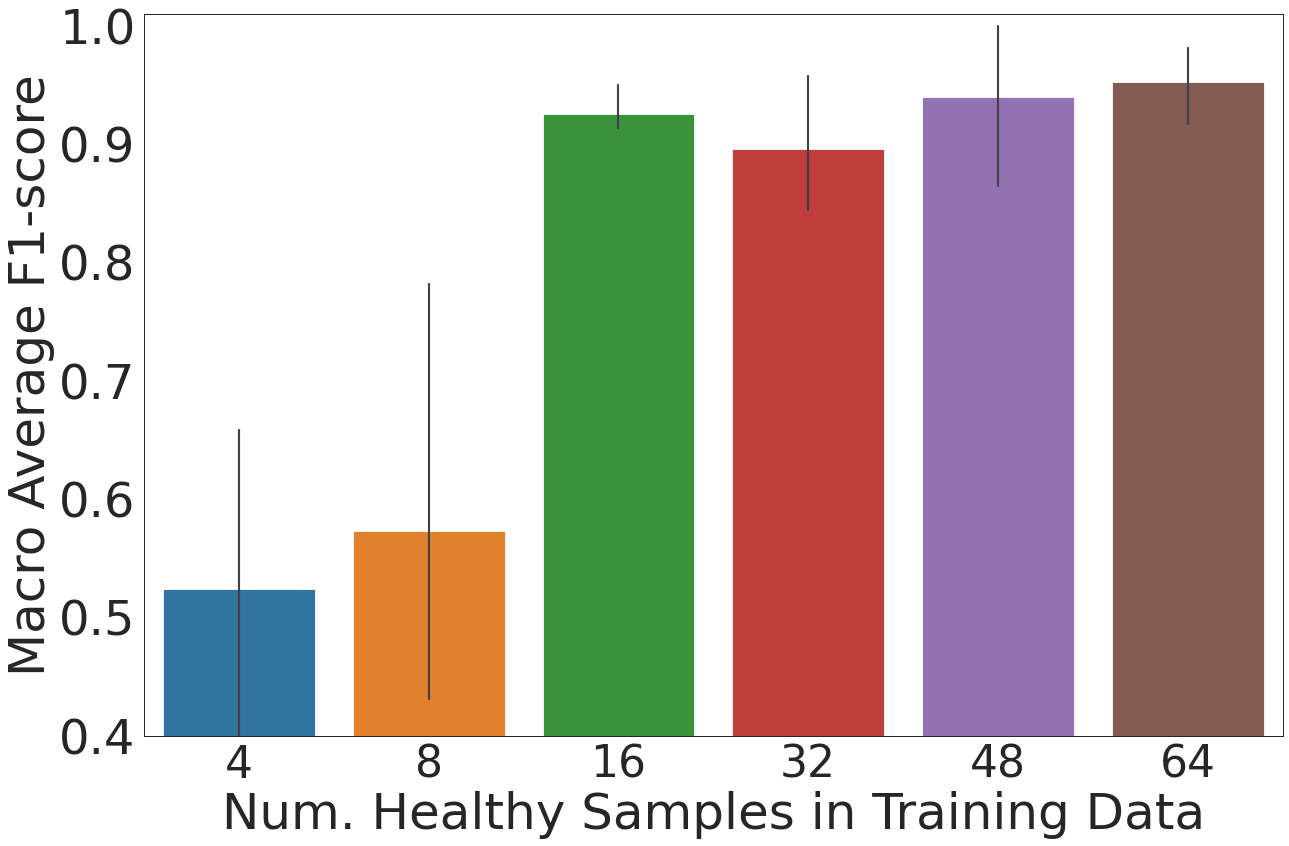

In [20]:
fig, ax = plt.subplots(1,1,figsize=(plot_params['fig_width'], plot_params['fig_height']))

ax = sns.barplot(x="num_samples", y="f1_scores", data=result_df)

ax.set_ylabel("Macro Average F1-score",size=plot_params['y_label_font'])
ax.set_xlabel(f"Num. Healthy Samples in Training Data",size=plot_params['x_label_font'])
ax.tick_params(axis='x', labelsize= plot_params['x_ticks_font'], rotation=0)
ax.tick_params(axis='y', labelsize= plot_params['y_ticks_font'])
ax.set_ylim([0.40, 1.01])

fig.suptitle("", fontsize=plot_params['fig_title_size'], y = 1.1) 
plt.tight_layout()
plt.savefig(Path(plot_output_dir) / f"prodigy_increasing_num_samples_results.pdf", bbox_inches='tight')
plt.show()